# Australian Typology calculations 

This notebook is made to cover the following typologies in the Sydney groups typologies list: 

* Census data: “Visitor from different sa2

 **For Communities that have been gentrified**
 
* Change in housing cost
* Change in rental cost 

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from pyspark import SparkContext
import numpy as np
from datetime import datetime
from datetime import date
import statsmodels.api as sm
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path, PureWindowsPath

In [2]:
pwd

'C:\\Users\\emman\\Box\\Spring 2020\\Displacement Studio\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Emmanuel Work Folder'

# Read in Data

In [3]:
# we use the `Path` function from pathlib to tell python what the path looks like. If you use this code you're
# going to need to change the name after `Users` to your username!
data_2011 = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/AU Work/2011_census_files")
data_2016 = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/AU Work/2016_census_files")
shp_file_path = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/SA2 Shapefiles")
corr_file = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/AU Work/2011_2016_correspondence")

In [4]:
#read in median values 
sa2_med11 = pd.read_csv(data_2011/'SA2_NSW/2011Census_B02_NSW_SA2_short.csv')
sa2_med16 = pd.read_csv(data_2016/'SA2_NSW/2016Census_G02_NSW_SA2.csv')

# Have columns reflect their respective years

In [5]:
# Rename columns in 2016 Census medians Data 
col_names16 = []
for col in sa2_med16.columns:
    col_names16.append(col+'_2016')
      
keys = list(sa2_med16)
values = col_names16
cols_dict = dict(zip(keys, values))
sa2_med16.rename(columns=cols_dict, inplace=True)
sa2_med16.rename(columns={'SA2_MAINCODE_2016_2016':'SA2_MAINCODE_2016'},inplace=True)

In [6]:
# Rename columns in 2011 Census medians Data
col_names11 = []
for col in sa2_med11.columns:
    col_names11.append(col+'_2011')

keys = list(sa2_med11)
values = col_names11
cols_dict = dict(zip(keys, values))
sa2_med11.rename(columns=cols_dict, inplace=True)
sa2_med11.rename(columns= {'region_id_2011':'region_id'},inplace=True)

# Perform merges on shape files and other datasets 

In [7]:
# Read in the sa2 Shapefile for 2016
sa2_shape16 = gpd.read_file(shp_file_path/'sa2_ucl.dbf')
sa2_shape16['SA2_MAIN16'] = sa2_shape16['SA2_MAIN16'].astype(int)
sa2_shape16.dropna(inplace=True)

# Merge shapefile with sa2_2016 data 
sa2_2016 = pd.merge(sa2_med16,sa2_shape16,left_on='SA2_MAINCODE_2016',right_on='SA2_MAIN16',how='left')
sa2_2016.dropna(inplace=True)

In [8]:
# Read in the sa2 Shapefile 
sa2_shape11 = gpd.read_file(shp_file_path/'SA2_2011_AUST.dbf')
sa2_shape11['SA2_MAIN'] = sa2_shape11['SA2_MAIN'].astype(int)

# Merge shapefile with medians
sa2_2011 = pd.merge(sa2_med11,sa2_shape11,left_on='region_id',right_on='SA2_MAIN',how='left')
sa2_2011.dropna(inplace=True)

In [9]:
# Correspondence testing 
corr = pd.read_csv(corr_file/'2011_2016_corr.csv')
corr_test11 = pd.merge(sa2_2011,corr, left_on='region_id',right_on='SA2_MAINCODE_2011',how='right')

In [10]:
corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426 entries, 0 to 2425
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SA2_MAINCODE_2011  2426 non-null   int64  
 1   SA2_NAME_2011      2426 non-null   object 
 2   SA2_MAINCODE_2016  2426 non-null   int64  
 3   SA2_NAME_2016      2426 non-null   object 
 4   RATIO              2425 non-null   float64
 5   PERCENTAGE         2425 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 113.8+ KB


In [11]:
corr_test11.dropna(inplace=True)
corr_test11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   region_id                           589 non-null    float64 
 1   Median_age_persons_2011             589 non-null    float64 
 2   Median_mortgage_repay_monthly_2011  589 non-null    float64 
 3   Median_Tot_prsnl_inc_weekly_2011    589 non-null    float64 
 4   Median_rent_weekly_2011             589 non-null    float64 
 5   Median_Tot_fam_inc_weekly_2011      589 non-null    float64 
 6   Average_num_psns_per_bedroom_2011   589 non-null    float64 
 7   Median_Tot_hhd_inc_weekly_2011      589 non-null    float64 
 8   Average_household_size_2011         589 non-null    float64 
 9   SA2_MAIN                            589 non-null    float64 
 10  SA2_NAME                            589 non-null    object  
 11  STATE_CODE                      

In [12]:
corr_merge = pd.merge(corr_test11,sa2_2016, left_on='SA2_MAINCODE_2016',right_on='SA2_MAINCODE_2016',how='left')
corr_merge.dropna(inplace=True)

In [13]:
corr_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 301 to 588
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   region_id                           270 non-null    float64 
 1   Median_age_persons_2011             270 non-null    float64 
 2   Median_mortgage_repay_monthly_2011  270 non-null    float64 
 3   Median_Tot_prsnl_inc_weekly_2011    270 non-null    float64 
 4   Median_rent_weekly_2011             270 non-null    float64 
 5   Median_Tot_fam_inc_weekly_2011      270 non-null    float64 
 6   Average_num_psns_per_bedroom_2011   270 non-null    float64 
 7   Median_Tot_hhd_inc_weekly_2011      270 non-null    float64 
 8   Average_household_size_2011         270 non-null    float64 
 9   SA2_MAIN                            270 non-null    float64 
 10  SA2_NAME                            270 non-null    object  
 11  STATE_CODE                    

In [14]:
# create a new dataframe only for joining sa2s to geometries
shape_merge = corr_merge[['SA2_MAINCODE_2016','SA4_NAME16','geometry_y']]
shape_merge.rename(columns={'geometry_y':'geometry'},inplace=True)

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Changing up methodology types: Comparing medians to medians over time 

In [15]:
#create a new dataframe out of the corr test above
chg_med_rent = corr_merge[['region_id','SA2_MAINCODE_2011','SA2_MAINCODE_2016','RATIO',
                           'Median_rent_weekly_2011','Median_rent_weekly_2016','geometry_x']]
chg_med_rent.rename(columns={'geometry_x':'geometry'},inplace=True)
chg_med_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 301 to 588
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   region_id                270 non-null    float64 
 1   SA2_MAINCODE_2011        270 non-null    int64   
 2   SA2_MAINCODE_2016        270 non-null    int64   
 3   RATIO                    270 non-null    float64 
 4   Median_rent_weekly_2011  270 non-null    float64 
 5   Median_rent_weekly_2016  270 non-null    float64 
 6   geometry                 270 non-null    geometry
dtypes: float64(4), geometry(1), int64(2)
memory usage: 16.9 KB


In [16]:
# Create a new variable that calculates change in rent between 2011 and 2016
chg_med_rent['pct_chg_rent']= (chg_med_rent.Median_rent_weekly_2016-chg_med_rent.Median_rent_weekly_2011)/chg_med_rent.Median_rent_weekly_2011

#replace inf values with null
chg_med_rent.replace([np.inf, -np.inf], np.nan,inplace=True)

# fill all null values with 0
chg_med_rent['pct_chg_rent'].fillna(0,inplace=True)

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [17]:
# create a pivot table to sum 
chg_med_rent = pd.pivot_table(chg_med_rent,index='SA2_MAINCODE_2016',values='pct_chg_rent',aggfunc=np.mean)
chg_med_rent.reset_index(inplace=True)

chg_med_rent['red_wat_dv'] = np.where((chg_med_rent.SA2_MAINCODE_2016==117031335)
                                      |(chg_med_rent.SA2_MAINCODE_2016==117031338),1,0)

chg_med_rent['marrick_dv'] = np.where((chg_med_rent.SA2_MAINCODE_2016==117021326),1,0)

In [18]:
chg_med_rent['pct_chg_rent'].groupby(chg_med_rent['red_wat_dv']).agg(['count','mean', 'median'])

,count,mean,median
red_wat_dv,,,
0,263,0.235994,0.227437
1,2,0.302706,0.302706


In [19]:
chg_med_rent['pct_chg_rent'].groupby(chg_med_rent['marrick_dv']).agg(['count','mean', 'median'])

,count,mean,median
marrick_dv,,,
0,264,0.236168,0.228004
1,1,0.323529,0.323529


In [20]:
avg_rent_chg = round(chg_med_rent.pct_chg_rent.mean()*100,2)
print('The average change in weekly rent payments for the Sydney UCL was a',avg_rent_chg,'% increase between 2011 and 2016.')

The average change in weekly rent payments for the Sydney UCL was a 23.65 % increase between 2011 and 2016.


In [21]:
chg_med_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SA2_MAINCODE_2016  265 non-null    int64  
 1   pct_chg_rent       265 non-null    float64
 2   red_wat_dv         265 non-null    int32  
 3   marrick_dv         265 non-null    int32  
dtypes: float64(1), int32(2), int64(1)
memory usage: 6.3 KB


In [22]:
# create a geodataframe out of the new file 
chg_med_rent = pd.merge(chg_med_rent,shape_merge,on='SA2_MAINCODE_2016',how='left')
chg_med_rent.dropna(inplace=True)
chg_med_rent = gpd.GeoDataFrame(chg_med_rent)

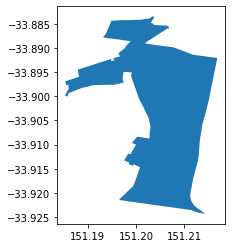

In [23]:
# let's isolate the sa2s that make up our case study areas of Redfern/Waterloo, Merrickville and Maroubra
red_wat_gdf = chg_med_rent[(chg_med_rent.SA2_MAINCODE_2016==117031335)
                          |(chg_med_rent.SA2_MAINCODE_2016==117031338)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
red_wat_simple = red_wat_gdf[['SA2_MAINCODE_2016','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
red_wat_sgdf=red_wat_simple.dissolve(by="SA4_NAME16")
red_wat_sgdf.plot()

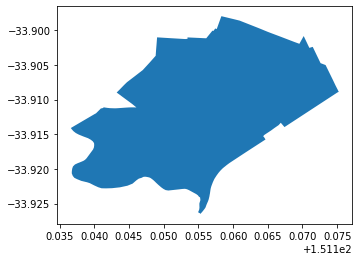

In [24]:
# let's isolate the sa2s that make up our case study areas of Redfern/Waterloo, Merrickville and Maroubra
marr_gdf = chg_med_rent[(chg_med_rent.SA2_MAINCODE_2016==117021326)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
marr_simple = marr_gdf[['SA2_MAINCODE_2016','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
marr_sgdf=marr_simple.dissolve(by="SA4_NAME16")
marr_sgdf.plot()

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


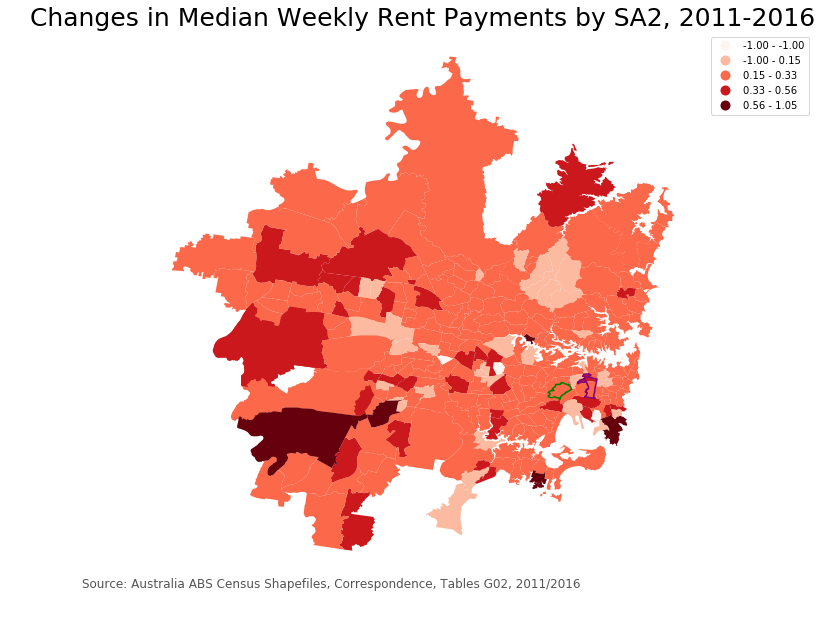

In [25]:
# plot geodf again with closeups 
figure, ax = plt.subplots(figsize=(14,10))
base= chg_med_rent.plot(column='pct_chg_rent', 
                        scheme = 'fisher_jenks',
                        k=5,legend=True,  
                        ax=ax,
                        cmap='Reds')


red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)
lims=plt.axis('equal')
ax.set_axis_off()

ax.set_title('Changes in Median Weekly Rent Payments by SA2, 2011-2016', fontdict={'fontsize':25})

ax.annotate('Source: Australia ABS Census Shapefiles, Correspondence, Tables G02, 2011/2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

### Changes in Median Monthly mortgage payments 

In [26]:
#create a new dataframe out of the corr test above
chg_med_mort = corr_merge[['region_id','SA2_MAINCODE_2011','SA2_MAINCODE_2016','RATIO',
                           'Median_mortgage_repay_monthly_2011','Median_mortgage_repay_monthly_2016','geometry_x']]
chg_med_mort.rename(columns={'geometry_x':'geometry'},inplace=True)

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
# Create a new variable that calculates change in rent between 2011 and 2016
chg_med_mort['pct_chg_mort']= (chg_med_mort.Median_mortgage_repay_monthly_2016-chg_med_mort.Median_mortgage_repay_monthly_2011)/chg_med_mort.Median_mortgage_repay_monthly_2011

#replace inf values with null
chg_med_mort.replace([np.inf, -np.inf], np.nan,inplace=True)

# fill all null values with 0
chg_med_mort['pct_chg_mort'].fillna(0,inplace=True)

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [28]:
# create a pivot table to sum 
chg_med_mort = pd.pivot_table(chg_med_mort,index='SA2_MAINCODE_2016',values='pct_chg_mort',aggfunc=np.mean)
chg_med_mort.reset_index(inplace=True)


chg_med_mort['red_wat_dv'] = np.where((chg_med_mort.SA2_MAINCODE_2016==117031335)
                                      |(chg_med_mort.SA2_MAINCODE_2016==117031338),1,0)

chg_med_mort['marrick_dv'] = np.where((chg_med_mort.SA2_MAINCODE_2016==117021326),1,0)

In [29]:
chg_med_mort['pct_chg_mort'].groupby(chg_med_mort['red_wat_dv']).agg(['count','mean', 'median'])

,count,mean,median
red_wat_dv,,,
0,263,0.001926,0.0000
1,2,-0.041600,-0.0416


In [30]:
chg_med_mort['pct_chg_mort'].groupby(chg_med_mort['marrick_dv']).agg(['count','mean', 'median'])

,count,mean,median
marrick_dv,,,
0,264,0.001517,0.000000
1,1,0.022747,0.022747


In [31]:
avg_mort_chg = round(chg_med_mort.pct_chg_mort.mean()*100,2)
print('The average change in monthly mortgate payments for the Sydney UCL was a',avg_mort_chg,'% decrease between 2011 and 2016.')

The average change in monthly mortgate payments for the Sydney UCL was a 0.16 % decrease between 2011 and 2016.


In [32]:
# do a merge to add the geometry variable 
chg_med_mort = pd.merge(chg_med_mort,shape_merge,left_on='SA2_MAINCODE_2016',right_on='SA2_MAINCODE_2016',how='left')

In [33]:
# create a geodataframe out of the new file 
chg_med_mort.dropna(inplace=True)
chg_med_mort = gpd.GeoDataFrame(chg_med_mort)

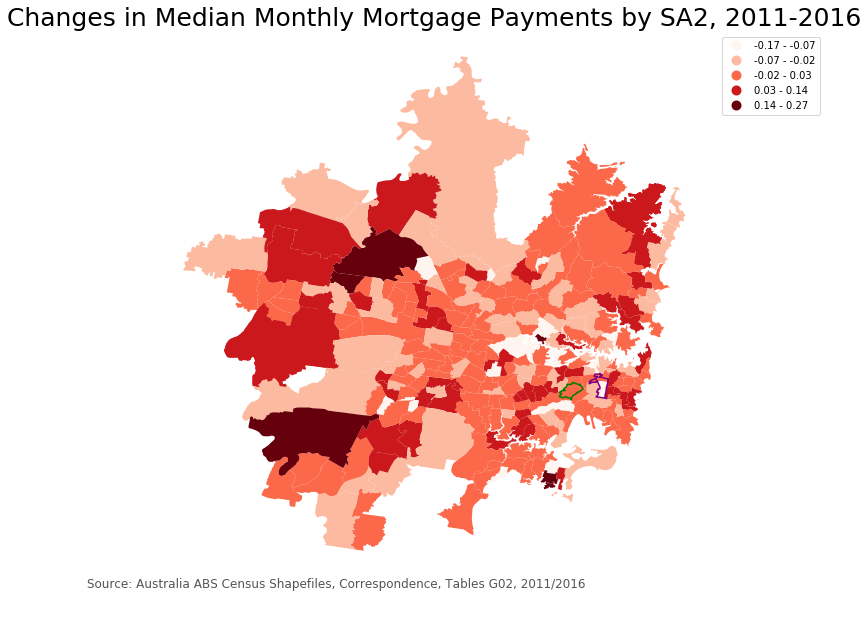

In [34]:
# plot geodf 
figure, ax = plt.subplots(figsize=(14,10))
base= chg_med_mort.plot(column='pct_chg_mort', 
                        scheme = 'fisher_jenks',
                        k=5,legend=True,  
                        ax=ax,cmap='Reds')


red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()

ax.set_title('Changes in Median Monthly Mortgage Payments by SA2, 2011-2016', fontdict={'fontsize':25})

ax.annotate('Source: Australia ABS Census Shapefiles, Correspondence, Tables G02, 2011/2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

In [49]:
chg_med_mort['mortgage_gt_med'] = np.where((chg_med_mort.pct_chg_mort> .000016),1,0)
chg_med_rent['rent_gt_med'] = np.where((chg_med_rent.pct_chg_rent> .2307),1,0)

In [50]:
chg_med_mort.to_csv("change_mortgage_2011_2016.csv")

In [51]:
chg_med_rent.to_csv("change_rent_2011_2016.csv")

I think that there are a few other calculations that we can probably do, but I think we're at a fairly good start. Once we read in the 2011 data, it should show us variation of this stuff over time and then we can chart time series

### A few considerations for next steps with this data: 

1. We can create a table that highlights the top 10 SA2s that have the highest concentration of places that are paying below median that are not the obvious candidates (you can see a few of them within Sydney Harbor)

2. Maybe we want to take account how this lower than median values look in terms of transportation development projects?